## This is a model developed to calculate the net hourly electrical energy output with features such as 'Avg Temperature', 'Exhaust Vacuum', 'Ambient Pressure' and 'Relative Humidity'.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [6]:
p_df=pd.read_csv('/content/Power_data.csv',encoding='ISO-8859-1')

In [7]:
p_df

,Avg temperature,Exhaust vacuum,Ambient pressure,Relative humidity,Net hourly electrical energy output
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


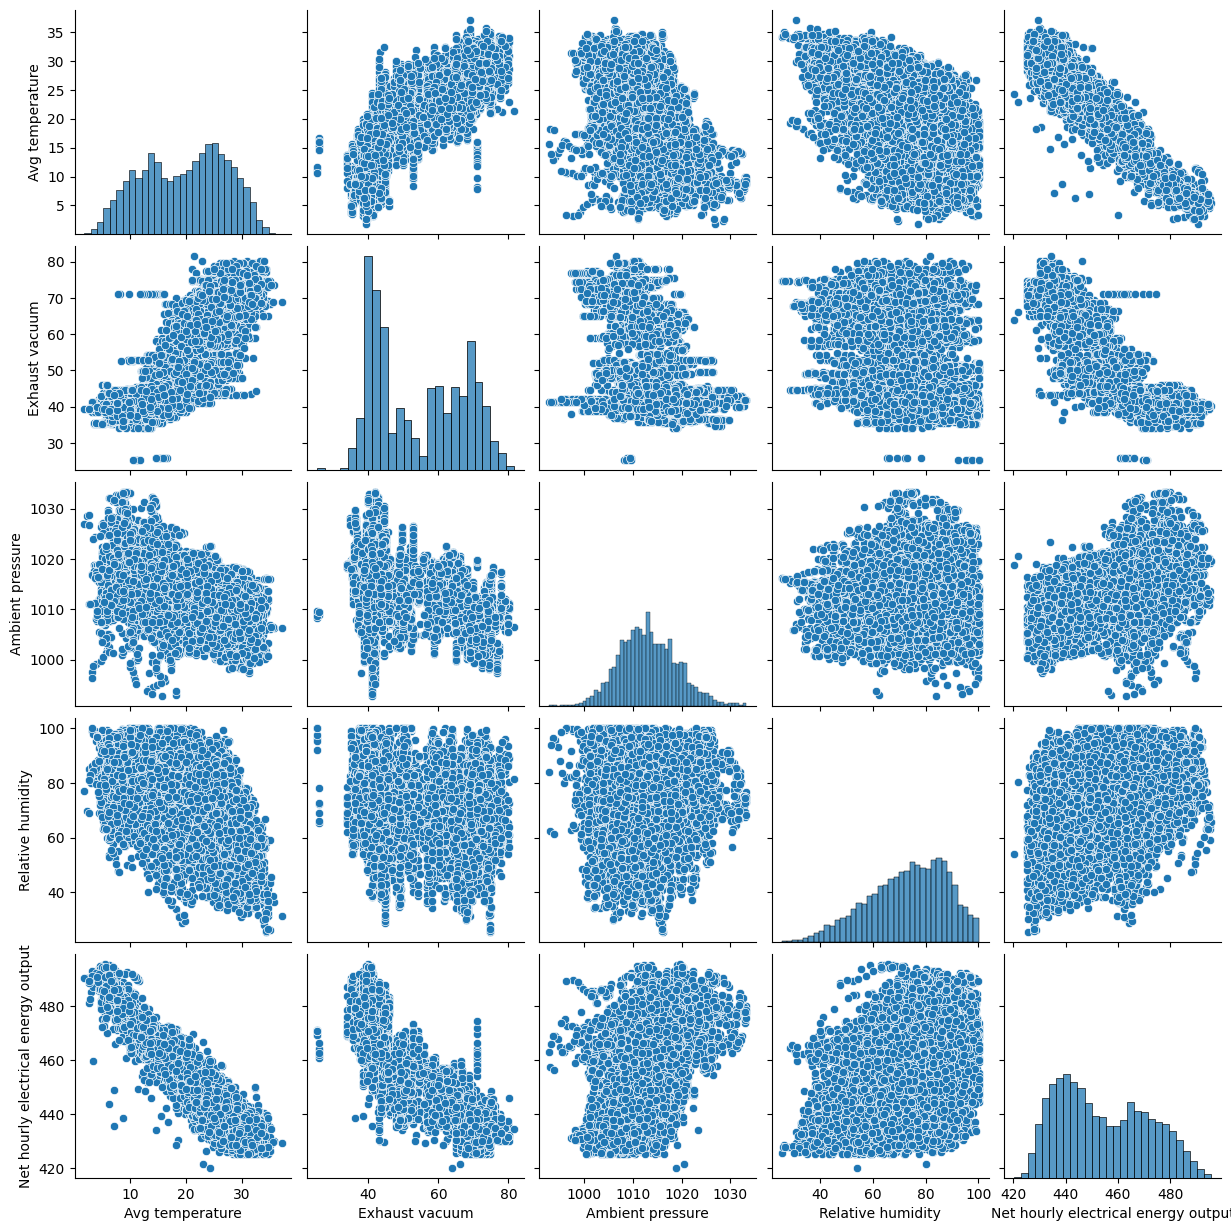

In [8]:
sns.pairplot(p_df)

In [9]:
X=p_df.drop('Net hourly electrical energy output',axis=1)

In [10]:
y=p_df['Net hourly electrical energy output']

In [11]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled
y=y.values.reshape(-1,1)
y_scaled=scaler.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_scaled,test_size=0.25)

In [12]:
from tensorflow.keras.regularizers import l2
model = Sequential()
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(4,)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
epochs_hist=model.fit(X_train,y_train,epochs=500,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/500
45/45 [==============================] - 5s 9ms/step - loss: 0.8693 - val_loss: 0.4358
Epoch 2/500
45/45 [==============================] - 0s 5ms/step - loss: 0.2720 - val_loss: 0.1580
Epoch 3/500
45/45 [==============================] - 0s 5ms/step - loss: 0.1133 - val_loss: 0.0769
Epoch 4/500
45/45 [==============================] - 0s 5ms/step - loss: 0.0600 - val_loss: 0.0433
Epoch 5/500
45/45 [==============================] - 0s 5ms/step - loss: 0.0368 - val_loss: 0.0280
Epoch 6/500
45/45 [==============================] - 0s 5ms/step - loss: 0.0253 - val_loss: 0.0201
Epoch 7/500
45/45 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0150
Epoch 8/500
45/45 [==============================] - 0s 6ms/step - loss: 0.0147 - val_loss: 0.0121
Epoch 9/500
45/45 [==============================] - 0s 5ms/step - loss: 0.0129 - val_loss: 0.0113
Epoch 10/500
45/45 [==============================] - 0s 5ms/step - loss: 0.0118 - val_loss: 0.0094
Epoch 11/

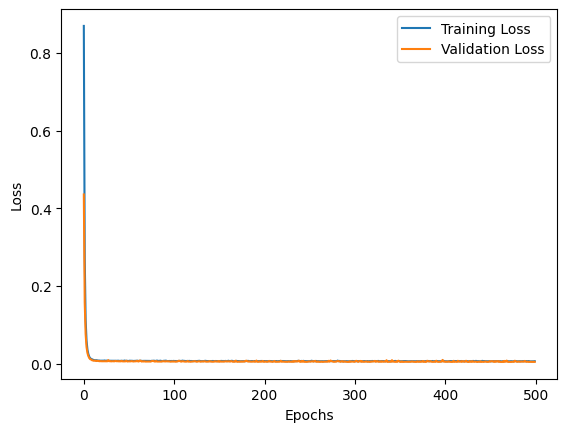

In [15]:
plt.plot(epochs_hist.history['loss'], label='Training Loss')
plt.plot(epochs_hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [16]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')

75/75 [==============================] - 0s 3ms/step - loss: 0.0053
Test loss: 0.005302876699715853


In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

test_predictions = model.predict(X_test)

rmse = mean_squared_error(y_test, test_predictions, squared=False)
mae=mean_absolute_error(y_test,test_predictions)
print(f'RMSE: {rmse}')
print(f'MAE:{mae}')

75/75 [==============================] - 0s 2ms/step
RMSE: 0.05807511736563096
MAE:0.04582479445882781
